In [45]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
import timeit

In [46]:
uid_songid_file_location = './Dataset/byUser.csv'
songid_mappings_file_location = './Dataset/kaggle_songs.txt'

In [47]:
uid_songid_file = open(uid_songid_file_location)
uid_songid_file_data = []
for line in uid_songid_file:
    uid_songid_file_data.append(line.strip().split('\t')[1].strip().split(','))
uid_songid_file_data = uid_songid_file_data[1:]
uid_songid_file.close()

In [4]:
songid_mappings_file = open(songid_mappings_file_location)
songid_mappings = {}
for line in songid_mappings_file:
    #print(line)
    temp_var = line.strip().split()
    songid_mappings[temp_var[0]] = int(temp_var[1])

songid_mappings_file.close()
#songid_mappings

In [12]:
#In transactional type data, convert hashed song_id to its corresponding numerical song_id 

for itemset in uid_songid_file_data:
    for item_num in range(len(itemset)):
        itemset[item_num] = songid_mappings[itemset[item_num]]   
    itemset.sort()

In [48]:
uid_songid_transaction_data = uid_songid_file_data
#len(uid_songid_transaction_data)

In [53]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 10)
#len(patterns)

In [54]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
for i in sorted_patterns:
    print(i)
#sorted_x[1:1000]

(('SOFRQTD12A81C233C0',), 5043)
(('SOAUWYT12A81C206F1',), 4483)
(('SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0'), 1137)
(('SOAUWYT12A81C206F1', 'SOSXLTC12AF72A7F54'), 1051)
(('SOBONKR12A58A7A7E0', 'SOSXLTC12AF72A7F54'), 902)
(('SOFRQTD12A81C233C0', 'SONYKOW12AB01849C9'), 787)
(('SOAXGDH12A8C13F8A1', 'SOFRQTD12A81C233C0'), 754)
(('SOAXGDH12A8C13F8A1', 'SONYKOW12AB01849C9'), 718)
(('SOAUWYT12A81C206F1', 'SOEGIYH12A6D4FC0E3'), 716)
(('SOBONKR12A58A7A7E0', 'SOEGIYH12A6D4FC0E3'), 657)
(('SODJWHY12A8C142CCE', 'SOFRQTD12A81C233C0'), 603)
(('SOFRQTD12A81C233C0', 'SOLFXKT12AB017E3E0'), 598)
(('SOAUWYT12A81C206F1', 'SOFRQTD12A81C233C0'), 556)
(('SODJWHY12A8C142CCE', 'SONYKOW12AB01849C9'), 515)
(('SOLFXKT12AB017E3E0', 'SONYKOW12AB01849C9'), 512)
(('SOAUWYT12A81C206F1', 'SOFLJQZ12A6D4FADA6'), 495)
(('SOBONKR12A58A7A7E0', 'SOFRQTD12A81C233C0'), 487)
(('SOBONKR12A58A7A7E0', 'SOFLJQZ12A6D4FADA6'), 469)
(('SOAUWYT12A81C206F1', 'SOVDSJC12A58A7A271'), 465)
(('SOBONKR12A58A7A7E0', 'SOVDSJC12A58A7A271'), 463

(('SOGSAYQ12AB018BA14', 'SOLGLUC12AB018A8FA'), 48)
(('SOBONKR12A58A7A7E0', 'SOLGLUC12AB018A8FA', 'SOVDSJC12A58A7A271'), 48)
(('SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0', 'SOPSOHT12A67AE0235'), 48)
(('SOAUWYT12A81C206F1', 'SOHYSXA12AB0186704'), 48)
(('SOFRQTD12A81C233C0', 'SOLWZVR12AB01849C6', 'SONYKOW12AB01849C9'), 48)
(('SOLLNTU12A6701CFDC', 'SOLRGNF12AB0187CF4'), 48)
(('SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0', 'SONQCXC12A6D4F6A37'), 48)
(('SOLRGVL12A8C143BC3', 'SOVWADY12AB0189C63'), 48)
(('SOBOAFP12A8C131F36', 'SONYKOW12AB01849C9', 'SOTWSXL12A8C143349'), 48)
(('SONYKOW12AB01849C9', 'SOTWSXL12A8C143349', 'SOUSMXX12AB0185C24'), 48)
(('SOKUPAO12AB018D576', 'SOTWSXL12A8C143349', 'SOUSMXX12AB0185C24'), 48)
(('SOFRQTD12A81C233C0', 'SOKUPAO12AB018D576', 'SOPTLQL12AB018D56F'), 48)
(('SODJWHY12A8C142CCE', 'SOKUPAO12AB018D576', 'SOPTLQL12AB018D56F'), 48)
(('SOLFXKT12AB017E3E0', 'SOLRGVL12A8C143BC3', 'SONYKOW12AB01849C9'), 48)
(('SOFRQTD12A81C233C0', 'SONYKOW12AB01849C9', 'SOSCIZP12AB0181D2F'

(('SONAJGS12A6310E200',), 34)
(('SOKWSJO12A58A79BC3',), 34)
(('SOEAPMP12A58A7C5FA',), 34)
(('SOVEBPD12A8AE46B9B',), 34)
(('SOOCUXH12AF72A712F',), 34)
(('SONJNQI12A6310EDEE',), 34)
(('SOHKKCY12A6701EC02',), 34)
(('SOBYKVE12AB017E275',), 34)
(('SOFFGTH12A67AE0925',), 34)
(('SODWZZQ12A6D4FA7B7',), 34)
(('SOLILFP12A8C145145',), 34)
(('SOCXRWT12A8C13D070',), 34)
(('SOPBWTB12A6D4FD16F',), 34)
(('SOSOTRB12A67AD827B',), 34)
(('SONZNRQ12AB018ABCC',), 34)
(('SOSCYAE12A6D4FAEDF',), 34)
(('SOGEXZO12AB018CD78',), 34)
(('SOFUPXW12A8C130D7C',), 34)
(('SOJFMRY12A8C135E2F',), 34)
(('SOOUIAO12A8C133D93',), 34)
(('SONYHQE12A8C13ED38',), 34)
(('SOTEZEB12AB0186237',), 34)
(('SOGWVAN12A8C13B53F',), 34)
(('SOOKGVW12A6D4FA2BD',), 34)
(('SOMZSHY12A8C1343B0',), 34)
(('SOPXJPQ12A58A7AAFF',), 34)
(('SOXMMIY12A81C216B9',), 34)
(('SOOZRDJ12A58A7CEBF',), 34)
(('SODENMQ12A6D4F8D48',), 34)
(('SOLJNZQ12A8C1440E0',), 34)
(('SOHQFCZ12AB0181C88',), 34)
(('SOURAVO12A6D4FB1A4',), 34)
(('SOWVWNZ12AB018A45A',), 34)
(('SOOSNTN

(('SOQHTUT12A8AE475F2',), 28)
(('SOQVLID12A6D4FB11A',), 28)
(('SOESKLY12A6310DFD1',), 28)
(('SOSUCNU12A6D4F590B',), 28)
(('SOQYFXH12AC468C5E4',), 28)
(('SODQMMX12A6D4F854B',), 28)
(('SOTSIQG12A6D4F46DF',), 28)
(('SORAOUS12A8C13950A',), 28)
(('SOCMGYC12A8C134ED4',), 28)
(('SOIZYWB12AB018BE1B',), 28)
(('SONOALN12AB017CC19',), 28)
(('SOSTPJX12A6701F62A',), 28)
(('SOSOUKN12A8C13AB79',), 28)
(('SOGPLBE12A58A80442',), 28)
(('SOTUHJP12AAF3B26D0',), 28)
(('SOSYJCM12A6D4FB304',), 28)
(('SOLMJGW12A58A78F29',), 28)
(('SOKTISX12A6D4FA9C7',), 28)
(('SOTZPGS12A58A7D052',), 28)
(('SOFLNVT12A8C13A2E4',), 28)
(('SOWBTMO12A6701C56D',), 28)
(('SOESBOJ12A6D4F791D',), 28)
(('SOJKOOR12A8C13C4FE',), 28)
(('SOMJJEA12A8C13AE66',), 28)
(('SOJKBXX12A67020689',), 28)
(('SOPGISP12AB0180D3C',), 28)
(('SOEEQAM12AB0182813',), 28)
(('SONVDBZ12A58A7A571',), 28)
(('SOOOWVU12A6D4FB572',), 28)
(('SOOSJKP12AB01859E2',), 28)
(('SOKPPGR12A81C217A7',), 28)
(('SOHUCSP12A8C13FED3',), 28)
(('SOZAYCQ127CF88C55A',), 28)
(('SOBNAZM

(('SOALWJY12A8AE46EE2',), 24)
(('SOJBABX12AB0189851',), 24)
(('SOWSDZW12AAF3B549E',), 24)
(('SOISBGU12A6310F232',), 24)
(('SOQCAWT12A81C23883',), 24)
(('SOFWGPD12A58A7BE9B',), 24)
(('SOZZFWG12A6D4FA002',), 24)
(('SOFDWQU12A6701F356',), 24)
(('SOLIGPA12A58A7CDE4',), 24)
(('SOJFBXS12A6D4F997A',), 24)
(('SOPBBUR12A6D4F73DB',), 24)
(('SOANTJR12AB01882ED',), 24)
(('SODVZAP12A58A78517',), 24)
(('SOVCUDL12AF72A7BA1',), 24)
(('SOSJPFC12AB017D6E3',), 24)
(('SOBJIUB12A58A7C552',), 24)
(('SOVOOJC12A8151CB37',), 24)
(('SOEAKIB12A8AE48D12',), 24)
(('SOKTFQO12A6D4F70C1',), 24)
(('SOIBZLN12A6D4F5E5F',), 24)
(('SORTOKT12A6701F9F1',), 24)
(('SOWIZCC12A6D4FDBE4',), 24)
(('SOFZFNX12A6701C151',), 24)
(('SOINSEY12A8C134B32',), 24)
(('SOGPMFZ12AB018399E',), 24)
(('SOBCQKJ12A6D4FA099',), 24)
(('SOECEVV12A8C1371ED',), 24)
(('SOBOHKS12A67AD72E3',), 24)
(('SOEUGZZ12A6D4F3381',), 24)
(('SOFBPGG12A8C13A07A',), 24)
(('SOTUYFC12A8C13AE26',), 24)
(('SOSRTVC12A8C144B76',), 24)
(('SOXKBAI12A8C133E4F',), 24)
(('SOJELWX

(('SOEGIYH12A6D4FC0E3', 'SOKLRPJ12A8C13C3FE', 'SONYKOW12AB01849C9'), 22)
(('SOBONKR12A58A7A7E0', 'SOKLRPJ12A8C13C3FE', 'SOWCKVR12A8C142411'), 22)
(('SOKLRPJ12A8C13C3FE', 'SONYKOW12AB01849C9', 'SOTWNDJ12A8C143984', 'SOWCKVR12A8C142411'), 22)
(('SODJWHY12A8C142CCE', 'SOKLRPJ12A8C13C3FE', 'SOPPROJ12AB0184E18', 'SOTWNDJ12A8C143984'), 22)
(('SODJWHY12A8C142CCE', 'SOKLRPJ12A8C13C3FE', 'SOLFXKT12AB017E3E0', 'SOTWNDJ12A8C143984'), 22)
(('SOFRQTD12A81C233C0', 'SOPPROJ12AB0184E18', 'SOVDSJC12A58A7A271'), 22)
(('SOAXGDH12A8C13F8A1', 'SOPPROJ12AB0184E18', 'SOUSMXX12AB0185C24', 'SOWCKVR12A8C142411'), 22)
(('SOFRQTD12A81C233C0', 'SONYKOW12AB01849C9', 'SOPPROJ12AB0184E18', 'SOWCKVR12A8C142411'), 22)
(('SOLFXKT12AB017E3E0', 'SOPPROJ12AB0184E18', 'SOTWNDJ12A8C143984', 'SOUSMXX12AB0185C24'), 22)
(('SONYKOW12AB01849C9', 'SOPPROJ12AB0184E18', 'SOTWNDJ12A8C143984', 'SOUVTSM12AC468F6A7'), 22)
(('SODJWHY12A8C142CCE', 'SOFRQTD12A81C233C0', 'SOPPROJ12AB0184E18', 'SOTWNDJ12A8C143984'), 22)
(('SODJWHY12A8C142CCE

(('SOANQFY12AB0183239', 'SOUSMXX12AB0185C24', 'SOUVTSM12AC468F6A7'), 20)
(('SOANQFY12AB0183239', 'SOBOAFP12A8C131F36', 'SOPPROJ12AB0184E18'), 20)
(('SOANQFY12AB0183239', 'SOBOAFP12A8C131F36', 'SOTWNDJ12A8C143984'), 20)
(('SOANQFY12AB0183239', 'SOBOAFP12A8C131F36', 'SOUSMXX12AB0185C24'), 20)
(('SOANQFY12AB0183239', 'SOBOAFP12A8C131F36', 'SOCKSGZ12A58A7CA4B'), 20)
(('SOANQFY12AB0183239', 'SOLFXKT12AB017E3E0', 'SOUFPNI12A8C142D19'), 20)
(('SOANQFY12AB0183239', 'SOCVTLJ12A6310F0FD', 'SOLFXKT12AB017E3E0'), 20)
(('SOANQFY12AB0183239', 'SOAUWYT12A81C206F1', 'SONYKOW12AB01849C9'), 20)
(('SOANQFY12AB0183239', 'SODJWHY12A8C142CCE', 'SOTWNDJ12A8C143984'), 20)
(('SOANQFY12AB0183239', 'SOFRQTD12A81C233C0', 'SOWCKVR12A8C142411'), 20)
(('SOPUCYA12A8C13A694', 'SOVWADY12AB0189C63'), 20)
(('SOAXGDH12A8C13F8A1', 'SOFRQTD12A81C233C0', 'SOVWADY12AB0189C63'), 20)
(('SODJWHY12A8C142CCE', 'SONYKOW12AB01849C9', 'SOVWADY12AB0189C63'), 20)
(('SOUFPNI12A8C142D19', 'SOWEHOM12A6BD4E09E'), 20)
(('SOLRGVL12A8C143BC3'

(('SOCPDKG12A67AE16F5',), 18)
(('SOZUOFH12A58A7A4D2',), 18)
(('SOSDORC12A8C14649E',), 18)
(('SOJSDKS12A58A7E92A',), 18)
(('SOJPFKI12A8C14044D',), 18)
(('SOHZZBB12A8C140FB8',), 18)
(('SOQHFKW12A8C13450A',), 18)
(('SOZUMBP12A8C134B3D',), 18)
(('SOZMXSK12A6D4F621A',), 18)
(('SODHXDD12AB017DB17',), 18)
(('SONVKIH12A8C13A80C',), 18)
(('SODGTUA12A58A7E1C5',), 18)
(('SOLMDDF12AF72A8FDA',), 18)
(('SOPJGEM12AF72A0729',), 18)
(('SORXZUE12AB01835C7',), 18)
(('SOHLSNF12A67AE01B9',), 18)
(('SOSGCWQ12A8C13A1B4',), 18)
(('SOQEAZA12A8C143304',), 18)
(('SOGTRLE12AB0182FB5',), 18)
(('SOGAALD12A6D4F58F2',), 18)
(('SOUWXWJ12A6D4FAB1A',), 18)
(('SOUXXLT12AB018A76F',), 18)
(('SOFPSKM12A6D4F5EA0',), 18)
(('SOXHZFL12AB0180EF1',), 18)
(('SOONUPC12A58A78AC6',), 18)
(('SOGLOXC12A8C143C29',), 18)
(('SOBRSQO12AB017F8E7',), 18)
(('SOODWMI12A8AE478A8',), 18)
(('SOFCEXL12A8C13B544',), 18)
(('SOVSFHM12A8C141A5E',), 18)
(('SOXLPKL12AC9075A44',), 18)
(('SOVXAUK12AB0181695',), 18)
(('SOZYHFR12AB0184E01',), 18)
(('SOLANTE

(('SOAUWYT12A81C206F1', 'SOPGYCQ12A6D4FB4DC'), 17)
(('SOBONKR12A58A7A7E0', 'SOJUXGA12AC961885C'), 17)
(('SOAUWYT12A81C206F1', 'SOJUXGA12AC961885C'), 17)
(('SODOWUC12AC9097E76', 'SOGWJEY12AC9618862', 'SOJUXGA12AC961885C'), 17)
(('SOGCWUH12AC90732B0', 'SOGSAYQ12AB018BA14', 'SOJUXGA12AC961885C'), 17)
(('SOJUXGA12AC961885C', 'SOUGCDK12AC95F075F', 'SOWCBKV12AC90732A6'), 17)
(('SOGWJEY12AC9618862', 'SOJUXGA12AC961885C', 'SOWCBKV12AC90732A6'), 17)
(('SOFKFXC12AC90732A5', 'SOGWJEY12AC9618862', 'SOJUXGA12AC961885C'), 17)
(('SOGWJEY12AC9618862', 'SOJUXGA12AC961885C', 'SOTASGN12AC9075A8F'), 17)
(('SODTHOY12AC9071AE7', 'SOFKFXC12AC90732A5', 'SOJUXGA12AC961885C'), 17)
(('SOIZFTE12AB0186842', 'SOWVBDQ12A8C13503D'), 17)
(('SOAUWYT12A81C206F1', 'SODTHOY12AC9071AE7'), 17)
(('SODTHOY12AC9071AE7', 'SOTASGN12AC9075A8F', 'SOYJDRA12AB017F30D'), 17)
(('SODTHOY12AC9071AE7', 'SOLWAHM12AB018EBC8', 'SOWCBKV12AC90732A6'), 17)
(('SODTHOY12AC9071AE7', 'SOLWAHM12AB018EBC8', 'SOUGCDK12AC95F075F'), 17)
(('SODTHOY12AC9

(('SOKRAMY12A8C140804', 'SONOYIB12A81C1F88C'), 16)
(('SOKRAMY12A8C140804', 'SOWCBKV12AC90732A6'), 16)
(('SOFGJCW12AF72A812D', 'SOTEGWG12AB01897AC'), 16)
(('SOBWSGV12AB018B5E0', 'SOFGJCW12AF72A812D'), 16)
(('SOBADEB12AB018275F', 'SOFGJCW12AF72A812D'), 16)
(('SOEGIYH12A6D4FC0E3', 'SOFKFXC12AC90732A5'), 16)
(('SOFKFXC12AC90732A5', 'SOUSMXX12AB0185C24'), 16)
(('SOFKFXC12AC90732A5', 'SOGWJEY12AC9618862', 'SOUGCDK12AC95F075F'), 16)
(('SOIMCDE12A6D4F8383', 'SOLRGVL12A8C143BC3'), 16)
(('SOIMCDE12A6D4F8383', 'SOPQLBY12A6310E992'), 16)
(('SOCLMAD12AB017FC09', 'SOIDDNJ12AC9071B90'), 16)
(('SOCLMAD12AB017FC09', 'SOXNZOW12AB017F756'), 16)
(('SOCLMAD12AB017FC09', 'SONIQRE12AF72A2B02'), 16)
(('SOCLMAD12AB017FC09', 'SOPPROJ12AB0184E18'), 16)
(('SOCLMAD12AB017FC09', 'SOFRQTD12A81C233C0', 'SOSROFB12AAF3B4C5D'), 16)
(('SORBBFV12AB017D710', 'SOWEJXA12A6701C574'), 16)
(('SOPTLQL12AB018D56F', 'SORBBFV12AB017D710'), 16)
(('SORBBFV12AB017D710', 'SOWCKVR12A8C142411'), 16)
(('SORBBFV12AB017D710', 'SOWRTJD12A8C1

(('SODOWUC12AC9097E76', 'SOIDDNJ12AC9071B90', 'SOIYIMC12AC9097E45'), 15)
(('SOSJSSU12A6D4F8F41', 'SOVDSJC12A58A7A271'), 15)
(('SOAYATB12A6701FD50', 'SODJWHY12A8C142CCE'), 15)
(('SONWUZV12AB0180BAD', 'SOPLUOT12A6D4F7AC3'), 15)
(('SOEPQXD12A58A7BBFE', 'SOHTKMO12AB01843B0'), 15)
(('SOEPQXD12A58A7BBFE', 'SONOYIB12A81C1F88C'), 15)
(('SOFRQTD12A81C233C0', 'SOUGMXP12AB017C76C'), 15)
(('SOAEYBP12AB0184573', 'SOLFXKT12AB017E3E0'), 15)
(('SOEWYLX12A6D4F8E5F', 'SOFRQTD12A81C233C0'), 15)
(('SODJWHY12A8C142CCE', 'SOVHYVB12A3F1EC277'), 15)
(('SOMESIV12A6D4FC6F2', 'SOVHYVB12A3F1EC277'), 15)
(('SOHLLRP12A6701F2F4', 'SONJILQ12A67020456'), 15)
(('SOHLLRP12A6701F2F4', 'SOWCKVR12A8C142411'), 15)
(('SOCGWCK12A67020F39', 'SOQWYAQ12A6D4FB9A3'), 15)
(('SOESWIW12AB017F1CD', 'SONYKOW12AB01849C9'), 15)
(('SODJWHY12A8C142CCE', 'SOESWIW12AB017F1CD'), 15)
(('SOBONKR12A58A7A7E0', 'SOJIJWG12AAF3B46C0'), 15)
(('SOMNTMT12A8C1400F6', 'SOMPTCI12AB017C416'), 15)
(('SOAXGDH12A8C13F8A1', 'SOMPTCI12AB017C416'), 15)
(('SOLFXK

(('SOELMZO12AB0189218', 'SOKMGBZ12AB0189220'), 14)
(('SOAMWDX12A58A7B898', 'SOPONUS12A6D4FB437'), 14)
(('SOBNAMV12A8C139423', 'SOHSUZG12A8C139410'), 14)
(('SOBPJQW12A8C13B943', 'SOQFOMR12A8C137299'), 14)
(('SOZSNUT12A8C13700C', 'SOZSQUY12A8C136FF7'), 14)
(('SOFVOQL12A6D4F7456', 'SOWKYIJ12AB017B0AA'), 14)
(('SOTRHUX12A8C14348B', 'SOTWNDJ12A8C143984'), 14)
(('SOENYXH12AB018513D', 'SOMSHNP12AB018513F'), 14)
(('SOJYYCX12A8AE463F2', 'SOMMOTJ12A8C136F18'), 14)
(('SOLAYYM12A8C144409', 'SOLBOPH12A8C13FF22'), 14)
(('SODIWYR12A8C13E1B4', 'SOVOSTH12A8C13E1C0'), 14)
(('SOACYKU12A5891CC64', 'SOMOZKO12AB017C323'), 14)
(('SODYESF12AF729BE66', 'SOJBCKM12AF72A3C81'), 14)
(('SODMRBV12AF72A03BB', 'SOYZKVX12A8C13A181'), 14)
(('SOBQODG12A8C13ECFF', 'SODMRBV12AF72A03BB'), 14)
(('SODMRBV12AF72A03BB', 'SOOVSUC12A8C13ED09'), 14)
(('SOPHARE12A6D4F949C', 'SOTUTKB12A6D4F949A'), 14)
(('SOEJVTY12A81C22428', 'SORXCZT12A81C2243D'), 14)
(('SOLAYFR12A81C22426', 'SORXCZT12A81C2243D'), 14)
(('SORQGSQ12A58A7943B', 'SOWEZG

(('SOAUWYT12A81C206F1', 'SOPTLQL12AB018D56F', 'SOTWNDJ12A8C143984'), 14)
(('SOLFXKT12AB017E3E0', 'SONYKOW12AB01849C9', 'SOPTLQL12AB018D56F', 'SOWCKVR12A8C142411'), 14)
(('SOAXGDH12A8C13F8A1', 'SONYKOW12AB01849C9', 'SOPTLQL12AB018D56F', 'SOTWNDJ12A8C143984'), 14)
(('SODJWHY12A8C142CCE', 'SONYKOW12AB01849C9', 'SOPTLQL12AB018D56F', 'SOTWNDJ12A8C143984'), 14)
(('SODJWHY12A8C142CCE', 'SOLFXKT12AB017E3E0', 'SOPTLQL12AB018D56F', 'SOUSMXX12AB0185C24'), 14)
(('SODJWHY12A8C142CCE', 'SONYKOW12AB01849C9', 'SOPTLQL12AB018D56F', 'SOUSMXX12AB0185C24'), 14)
(('SOHTKMO12AB01843B0', 'SOKLRPJ12A8C13C3FE', 'SOUVTSM12AC468F6A7'), 14)
(('SOAUWYT12A81C206F1', 'SOHTKMO12AB01843B0', 'SOKLRPJ12A8C13C3FE'), 14)
(('SOAXGDH12A8C13F8A1', 'SOKLRPJ12A8C13C3FE', 'SOPUCYA12A8C13A694'), 14)
(('SOFLJQZ12A6D4FADA6', 'SOKLRPJ12A8C13C3FE', 'SOVDSJC12A58A7A271'), 14)
(('SOKLRPJ12A8C13C3FE', 'SONYKOW12AB01849C9', 'SOSXLTC12AF72A7F54', 'SOWCKVR12A8C142411'), 14)
(('SOBONKR12A58A7A7E0', 'SODJWHY12A8C142CCE', 'SOKLRPJ12A8C13C3FE

(('SOBSLVH12A8C131F38', 'SODJWHY12A8C142CCE'), 13)
(('SOAUFOF12AB0180C65', 'SOXKOIY12A8C13C1EA'), 13)
(('SOBABRB12A6701DF4B', 'SOCMHES12AB0186FCF'), 13)
(('SOCMHES12AB0186FCF', 'SOKUPAO12AB018D576'), 13)
(('SOCMHES12AB0186FCF', 'SODWXJW12AAA8C5C29'), 13)
(('SOCMHES12AB0186FCF', 'SOTWSXL12A8C143349'), 13)
(('SOCMHES12AB0186FCF', 'SONHWUN12AC468C014'), 13)
(('SOADQPP12A67020C82', 'SOCMHES12AB0186FCF'), 13)
(('SOKUECJ12A6D4F6129', 'SOLRGNF12AB0187CF4'), 13)
(('SOGPBAW12A6D4F9F22', 'SOKUECJ12A6D4F6129'), 13)
(('SOKUECJ12A6D4F6129', 'SOUSMXX12AB0185C24'), 13)
(('SOLFXKT12AB017E3E0', 'SOYJDRA12AB017F30D'), 13)
(('SOLGLUC12AB018A8FA', 'SOUGCDK12AC95F075F', 'SOYJDRA12AB017F30D'), 13)
(('SOFRQTD12A81C233C0', 'SOGCWUH12AC90732B0', 'SOYJDRA12AB017F30D'), 13)
(('SOFRQTD12A81C233C0', 'SOUGCDK12AC95F075F', 'SOYJDRA12AB017F30D'), 13)
(('SOGSAYQ12AB018BA14', 'SOTASGN12AC9075A8F', 'SOYJDRA12AB017F30D'), 13)
(('SODGVGW12AC9075A8D', 'SOTASGN12AC9075A8F', 'SOYJDRA12AB017F30D'), 13)
(('SOGWJEY12AC9618862',

(('SOEZSJI12AB01829EA',), 12)
(('SOMESHL12AB0182912',), 12)
(('SOLBBAL12A6D4F7587',), 12)
(('SOGOTLO12AB0182C88',), 12)
(('SOEHUXQ12A6D4FC2CA',), 12)
(('SOOKHGK12A6D4F3E66',), 12)
(('SOLTOND12A8C13ED7C',), 12)
(('SOYZNHL12AB0180130',), 12)
(('SOSLBLP12A6D4FB4AA',), 12)
(('SONSZVP12AF729F13C',), 12)
(('SOCJAGJ12A8C13AC96',), 12)
(('SOQORNC12AB0184112',), 12)
(('SOSEQID12A58A7DCD2',), 12)
(('SOGENHD12A8C13609D',), 12)
(('SOWQJGC12A6D4F703A',), 12)
(('SOXDSBL12AF72A11C1',), 12)
(('SODIUVN12A6D4F79D4',), 12)
(('SOBHIHD12AAF3B49BB',), 12)
(('SOLUMIA12A67AD978E',), 12)
(('SONFXGJ12A81C2322F',), 12)
(('SOYPXIJ12A6D4F8A2C',), 12)
(('SONLTKL12A8C144BBC',), 12)
(('SOTARGT12A8C1417E0',), 12)
(('SOJWOIF12AB01876DB',), 12)
(('SOUUEGD12A58A8024E',), 12)
(('SOBRQNJ12AB017C209',), 12)
(('SODNWXE12A6D4F94D3',), 12)
(('SOBSZRC12A58A7D975',), 12)
(('SOUXKXE12A58A7A1E7',), 12)
(('SOKJGQL12AC960A39E',), 12)
(('SONFBFB12B0B808A05',), 12)
(('SOFZWCY12AAF3B3CCD',), 12)
(('SOOICQK12A8C1359A4',), 12)
(('SOHCJHE

(('SOGDDKR12A6701E8FA', 'SOHYSXA12AB0186704', 'SOKOXWU12AF72AD1BC'), 12)
(('SOFEGST12A58A7D682', 'SOXQYSC12A6310E908'), 12)
(('SOANQFY12AB0183239', 'SOFEGST12A58A7D682'), 12)
(('SOFEGST12A58A7D682', 'SOGTQNI12AB0184A5C'), 12)
(('SOFEGST12A58A7D682', 'SOUVTSM12AC468F6A7'), 12)
(('SOCKSGZ12A58A7CA4B', 'SOFEGST12A58A7D682'), 12)
(('SOIZLKI12A6D4F7B61', 'SOTEKMT12A67AD954E'), 12)
(('SOTEKMT12A67AD954E', 'SOUSMXX12AB0185C24'), 12)
(('SOFRQTD12A81C233C0', 'SOVEUVC12A6310EAF1'), 12)
(('SOBPKPW12A6701E8F9', 'SOHYSXA12AB0186704', 'SOVEUVC12A6310EAF1'), 12)
(('SOPCTBB12AF72A1B64', 'SOVEUVC12A6310EAF1', 'SOWGXOP12A6701E93A'), 12)
(('SOKOXWU12AF72AD1BC', 'SOOLULU12A6701FBC4', 'SOVEUVC12A6310EAF1'), 12)
(('SONEJIJ12AB0185727', 'SOTWSXL12A8C143349'), 12)
(('SOHYSXA12AB0186704', 'SOLWHSJ12A67AE227B'), 12)
(('SOKUPAO12AB018D576', 'SOLWHSJ12A67AE227B'), 12)
(('SOAXGDH12A8C13F8A1', 'SOLWHSJ12A67AE227B'), 12)
(('SOFLJQZ12A6D4FADA6', 'SOLWHSJ12A67AE227B'), 12)
(('SOBOAFP12A8C131F36', 'SOUKXIN12A8C133C7F')

(('SOLRGVL12A8C143BC3', 'SOPTLQL12AB018D56F', 'SOSXLTC12AF72A7F54'), 12)
(('SOFRQTD12A81C233C0', 'SOLFXKT12AB017E3E0', 'SOLRGVL12A8C143BC3', 'SOPPROJ12AB0184E18'), 12)
(('SOFRQTD12A81C233C0', 'SOLRGVL12A8C143BC3', 'SONYKOW12AB01849C9', 'SOPPROJ12AB0184E18'), 12)
(('SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0', 'SOLRGVL12A8C143BC3', 'SOTWNDJ12A8C143984'), 12)
(('SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0', 'SOFRQTD12A81C233C0', 'SOLRGVL12A8C143BC3'), 12)
(('SOLFXKT12AB017E3E0', 'SOLRGVL12A8C143BC3', 'SOTWNDJ12A8C143984', 'SOUVTSM12AC468F6A7'), 12)
(('SOLRGVL12A8C143BC3', 'SONYKOW12AB01849C9', 'SOTWNDJ12A8C143984', 'SOUVTSM12AC468F6A7'), 12)
(('SOAXGDH12A8C13F8A1', 'SOLRGVL12A8C143BC3', 'SOPTLQL12AB018D56F', 'SOTWNDJ12A8C143984'), 12)
(('SOLFXKT12AB017E3E0', 'SOLRGVL12A8C143BC3', 'SOPTLQL12AB018D56F', 'SOTWNDJ12A8C143984'), 12)
(('SOAXGDH12A8C13F8A1', 'SOFRQTD12A81C233C0', 'SOLRGVL12A8C143BC3', 'SOTWNDJ12A8C143984'), 12)
(('SOAXGDH12A8C13F8A1', 'SOLRGVL12A8C143BC3', 'SOPTLQL12AB018D56F', 'SOU

(('SOGFKJE12A8C138D6A', 'SORKFWO12A8C138D83', 'SOVPDKK12A8C138DA5'), 11)
(('SONSAEZ12A8C138D7A', 'SORKFWO12A8C138D83', 'SOVYIYI12A8C138D88'), 11)
(('SOJWBZK12A58A78AF7', 'SORKFWO12A8C138D83', 'SOVYIYI12A8C138D88'), 11)
(('SOKUPAO12AB018D576', 'SOLNZIU12AB01896D2'), 11)
(('SOTKTQG12A6BD5294E', 'SOYELXR12A8C14153A'), 11)
(('SOFJIZM12A58A7F878', 'SOTKTQG12A6BD5294E'), 11)
(('SOTAAHE12A8AE48C5C', 'SOWOMMY127F8096DF9', 'SOXPFLM12A8AE48C50'), 11)
(('SOAEIDM12A6D4F8463', 'SOPUCYA12A8C13A694'), 11)
(('SOCSRDW12A58A760DF', 'SOJGRIS12AB018B889', 'SOPFAVX12A8C1335A6'), 11)
(('SOGXSWA12A6D4FBC99', 'SOQQGBB12A6D4FCE33'), 11)
(('SOIOFZH12A6D4FCE35', 'SOQEXLO12A58A79D0E'), 11)
(('SOIHBBD12A6D4F8EE9', 'SOQEXLO12A58A79D0E'), 11)
(('SODKJWI12A8151BD74', 'SOQLNEY12B0B8062FA'), 11)
(('SOAIILB12A58A776F7', 'SOCJCVE12A8C13CDDB'), 11)
(('SOTUKRT12A58A76AEB', 'SOURIBK12AB01805EE'), 11)
(('SOSFSTC12A8C141219', 'SOURIBK12AB01805EE'), 11)
(('SOCCOOK12A8C13EF91', 'SOWZXGX12A8C13B82D'), 11)
(('SOMVMVF12AB018C9A6',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)
len(rules)

465

In [9]:
#Run FP for various different Min Sup values

MAX_NUM = 8
MIN_CONF = 0.5
min_sup_array = [5*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
num_itemsets_array = []
time_taken_array = []
num_association_rules_array = []
for i in range(len(min_sup_array)):
    start = timeit.default_timer()
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, min_sup_array[i])
    num_itemsets_array.append(len(patterns))
    stop = timeit.default_timer()
    time_taken_array.append(stop-start)
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF)
    num_association_rules_array.append(len(rules))


In [10]:
num_itemsets_array

[293542, 80690, 27999, 10352, 3496, 1074, 313, 121]

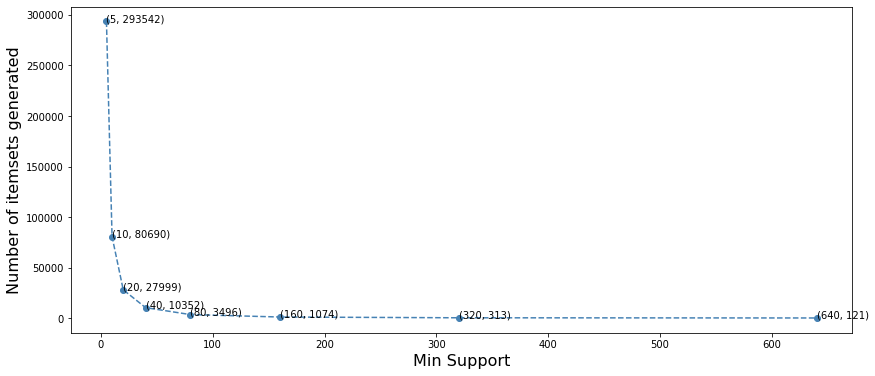

In [11]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_itemsets_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of itemsets generated", fontsize=16)
for i in range(0,len(num_itemsets_array)):
    plt.text(min_sup_array[i], num_itemsets_array[i],'({}, {})'.format(min_sup_array[i], num_itemsets_array[i]))
plt.show()

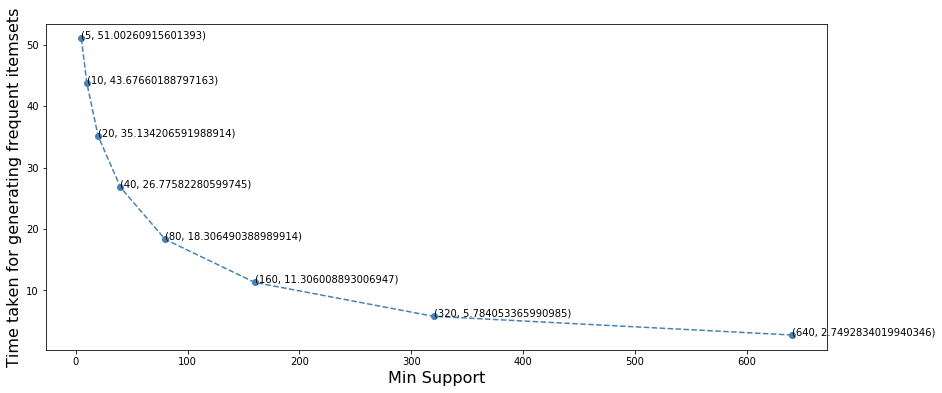

In [12]:
#Plot time taken to find frequent itemsets with respect to MIN_SUP

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Time taken for generating frequent itemsets", fontsize=16)
for i in range(0,len(time_taken_array)):
    plt.text(min_sup_array[i], time_taken_array[i],'({}, {})'.format(min_sup_array[i], time_taken_array[i]))
plt.show()

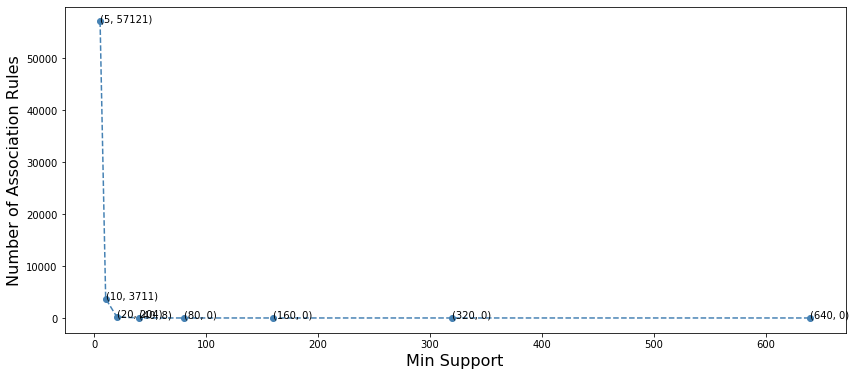

In [13]:
#Plot number of association rules with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(min_sup_array[i], num_association_rules_array[i],'({}, {})'.format(min_sup_array[i], num_association_rules_array[i]))
plt.show()

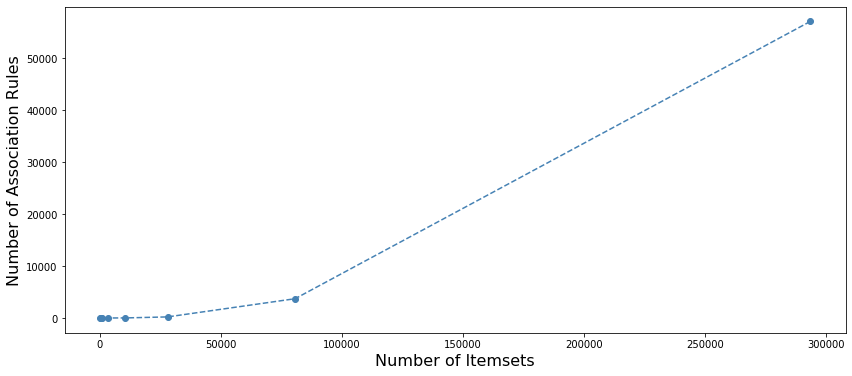

In [14]:
#Plot number of association rules with respect to number of itemsets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(num_itemsets_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Number of Itemsets", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(num_itemsets_array[i], num_association_rules_array[i],'({}, {})'.format(num_itemsets_array[i], num_association_rules_array[i]))
plt.show()

In [15]:
#Run FP and generate association rules for various different values of MIN_CONF

MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
MIN_SUP = 20
#min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
time_taken_array = []
num_association_rules_array = []
for i in range(len(MIN_CONF_ARRAY)):
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
    start = timeit.default_timer()
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
    stop = timeit.default_timer()
    num_association_rules_array.append(len(rules))
    time_taken_array.append(stop-start)

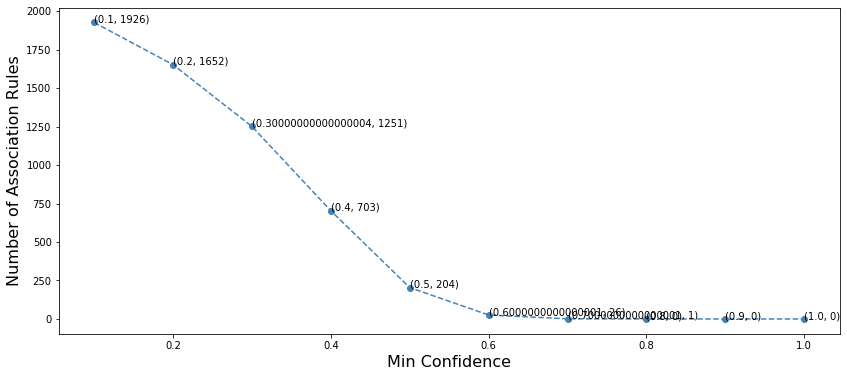

In [16]:
#Plot number of association rules with respect to Confidence Values 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

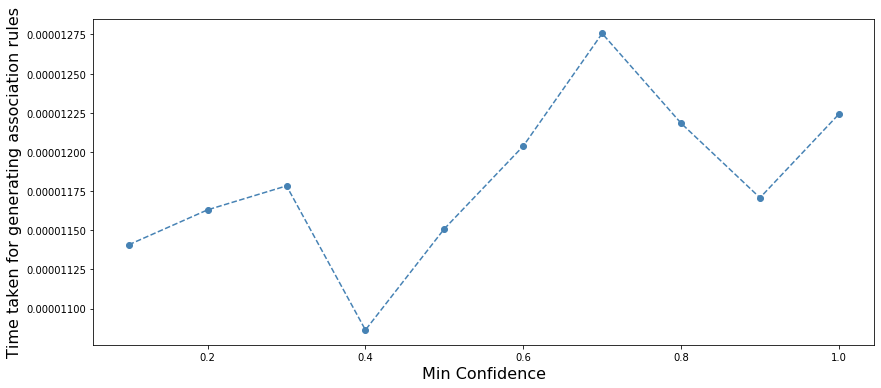

In [33]:
#Plot time taken to generate association rules with respect to MIN_CONF

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(time_taken_array)):
#     plt.text(MIN_CONF_ARRAY[i], time_taken_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], time_taken_array[i]))
plt.show()

In [18]:
#Run FP and generate association rules for various different values of MIN_CONF

MAX_NUM = 8
MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
OVERALL_time_taken_array = []
OVERALL_num_association_rules_array = []
for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    time_taken_array = []
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    num_association_rules_array = []
    for i in range(len(MIN_CONF_ARRAY)):
        patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
        start = timeit.default_timer()
        rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
        stop = timeit.default_timer()
        num_association_rules_array.append(len(rules))
        time_taken_array.append(stop-start)
        
    OVERALL_time_taken_array.append(time_taken_array)
    OVERALL_num_association_rules_array.append(num_association_rules_array)

Calculating for MIN_SUP = 10
Calculating for MIN_SUP = 20
Calculating for MIN_SUP = 40
Calculating for MIN_SUP = 80
Calculating for MIN_SUP = 160
Calculating for MIN_SUP = 320
Calculating for MIN_SUP = 640
Calculating for MIN_SUP = 1280


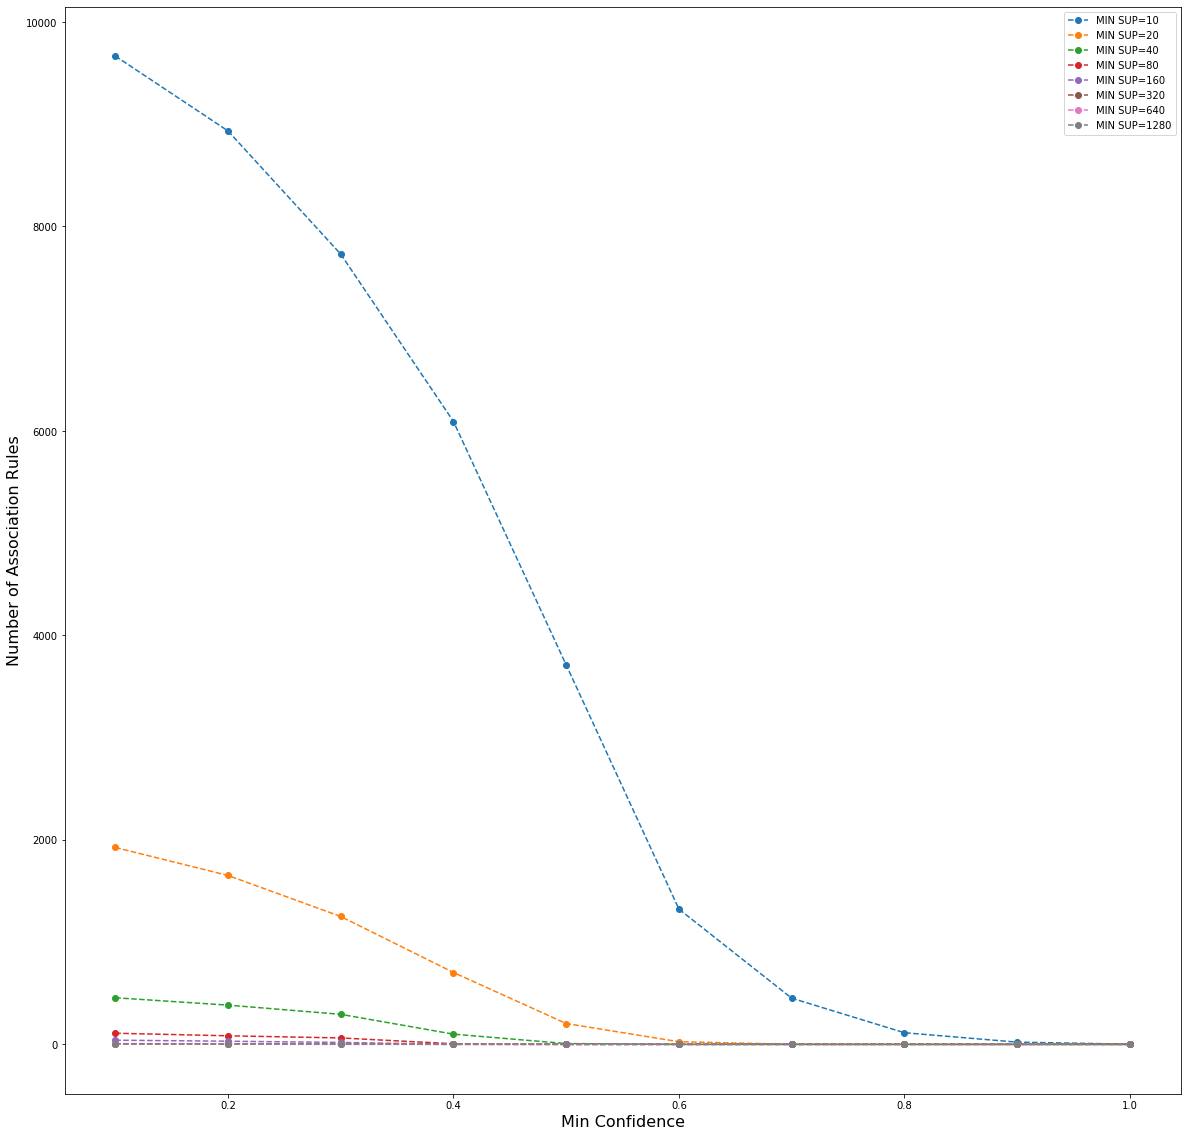

In [44]:
#Plot number of association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_num_association_rules_array[i], linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

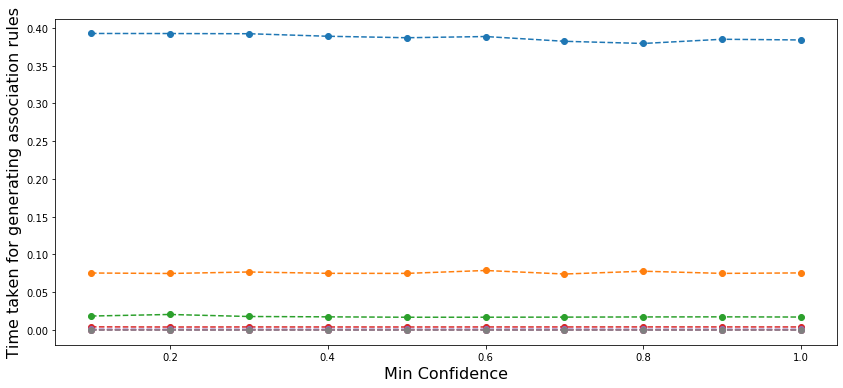

In [22]:
#Plot time taken to generate association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

for i in range(len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_time_taken_array[i],linestyle='--', marker='o')
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()